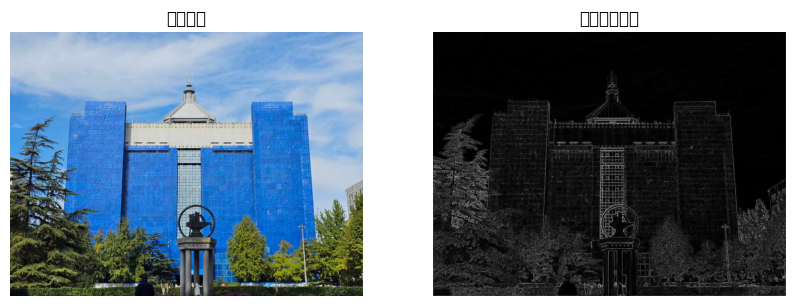

In [7]:
import torch
import torch.nn as nn
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Sobel算子，用于更清晰的边缘检测
sobel_kernel_x = torch.tensor([[[[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]]], dtype=torch.float32)
sobel_kernel_y = torch.tensor([[[[-1, -2, -1], [0, 0, 0], [1, 2, 1]]]], dtype=torch.float32)

# 定义边缘检测操作函数
def edge_detection_operator(image):
    device = image.device  # 获取图像设备（CPU或CUDA）

    # 设置卷积层并加载Sobel算子
    sobel_conv_x = nn.Conv2d(1, 1, kernel_size=3, padding=1, bias=False).to(device)
    sobel_conv_y = nn.Conv2d(1, 1, kernel_size=3, padding=1, bias=False).to(device)
    sobel_conv_x.weight = nn.Parameter(sobel_kernel_x.to(device))
    sobel_conv_y.weight = nn.Parameter(sobel_kernel_y.to(device))

    # 将图像转换为灰度
    if image.shape[1] == 3:
        image = torch.mean(image, dim=1, keepdim=True)

    # 应用Sobel算子获取边缘信息
    edges_x = sobel_conv_x(image)
    edges_y = sobel_conv_y(image)

    # 合并x和y方向上的边缘
    edges = torch.sqrt(edges_x ** 2 + edges_y ** 2)
    return edges

# 处理和显示图像
def process_image(image_path):
    # 加载和预处理图像
    image = Image.open(image_path).convert("RGB")
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize([0.5], [0.5])  # 归一化图像以匹配张量格式
    ])
    image_tensor = transform(image).unsqueeze(0)  # 添加batch维度

    # 应用边缘检测算子
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    image_tensor = image_tensor.to(device)
    edge_output = edge_detection_operator(image_tensor)

    # 转换输出为可视化格式
    edge_output = edge_output.squeeze().cpu().detach().numpy()

    # 显示结果
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title("原始图像")
    plt.axis("off")
    
    plt.subplot(1, 2, 2)
    plt.imshow(edge_output, cmap="gray")
    plt.title("边缘检测输出")
    plt.axis("off")
    plt.show()

# 调用函数处理已上传的图像
process_image(r"C:\Users\32461\Desktop\pictures\微信图片_20241022134200.jpg")


In [ ]:
r"C:\Users\32461\Desktop\pictures\微信图片_20241022134200.jpg"